# Условие задачи


$$\begin{equation*} 
    \begin{cases}
        y'' + \frac{0.5}{1 - 0.5y}y'^2 = 0, 0 < x \leq 1, \\
        y(0) = y_0, y(1) = 0   
   \end{cases}
\end{equation*}$$
$$y_0 = 0.25; 0.5; 1; 1.5; 1.8; 1.9; 1.95$$

# Метод стрельбы

Сделаем замену $y' = z$ и получим систему:
$$\begin{equation*} 
    \begin{cases}
        y' = z \\
        z' = - \frac{0.5}{1 - 0.5y}z^2
   \end{cases}
\end{equation*}$$

Теперь мы можем решить эту систему дифференциальных уравнений методом Рунге-Кутта. Для этого сначала зададим начальные значения для $y$ и $z$, а затем будем изменять значение $z(0)$ до тех пор, пока не будет выполнено условие $y(1) = 0$.

Алгоритм метода стрельбы для данной задачи:
1. Задаем начальные значения $y(0) = y_0$ и $z(0) = p$, где $p$ - начальное значение для $z(0)$.
2. Решаем систему дифференциальных уравнений с начальными значениями из шага 1 методом Рунге-Кутта.
3. Вычисляем значение функции $y(1)$ из решения системы уравнений.
4. Изменяем значение $p$ и повторяем шаги 2-3 до тех пор, пока $y(1) = 0$. Значение ищем с помощью бинарного поиска в неком диапазоне: если полученное значение $y(1) < 0$, то берём значение производной $y'(0) = z(0) = p$ больше, если $y(1) > 0$, то берём меньше
5. Найденная таким образом функция $y(x)$ является искомым решением задачи.


# Реализация

In [73]:
import numpy as np
import matplotlib.pyplot as plt


In [74]:
def System(x, vec):
  f = np.array([0.0, 0.0])
  f[0] = vec[1]
  f[1] = -0.5 * vec[1]**2 / (1 - 0.5 * vec[0])
  return f


def RungeKuttaIteration_4Order(x_n, vec_n, f, h = 0.01):
  f_1 = f(x_n, vec_n)
  f_2 = f(x_n + h / 2, vec_n + f_1 * h / 2)
  f_3 = f(x_n + h / 2, vec_n + f_2 * h / 2)
  f_4 = f(x_n + h, vec_n + f_3 * h)

  vec_n_1 = vec_n + h / 6 * (f_1 + 2 * f_2 + 2 * f_3 + f_4)
  return vec_n_1


def SolutionsRK(vec_start, x_start = 0.0, x_end = 1.0, h = 0.001):
  x_num = int(x_end / h)

  x_array = np.array([x_start])
  vec_array = np.array([vec_start])

  for i in range(0, x_num):
    vec_new = RungeKuttaIteration_4Order(x_array[i], vec_array[i], System, h)
    vec_array = np.append(vec_array, [vec_new], axis = 0)
    x_array = np.append(x_array, [h * (i + 1)])

  return vec_array, x_array


def BinSolutionSearch(z0_left, z0_right, y0, y1 = 0, abs_tol = 1e-8):
  z0_middle = (z0_left + z0_right) / 2
  new_sol, new_x_array = SolutionsRK(vec_start = np.array([y0, z0_middle]))
  y1_new = new_sol[-1][0] # y(1)
  if abs(y1_new - y1) < abs_tol:
    return new_sol, new_x_array
  elif y1_new < y1:
    return BinSolutionSearch(z0_middle, z0_right, y0)
  else:
    return BinSolutionSearch(z0_left, z0_middle, y0)


def ShowSoulutionPlots(y, x, p, y1):
  clear_output(wait=True)
  plt.figure(figsize=[12, 5], dpi=100)
  plt.plot(x, y, label = "y")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.title(f"y(x): y'(0) = {p}, y(1) = {y1}")
  plt.grid()
  plt.show()

# Графики

##### $y_0 = 0,25$

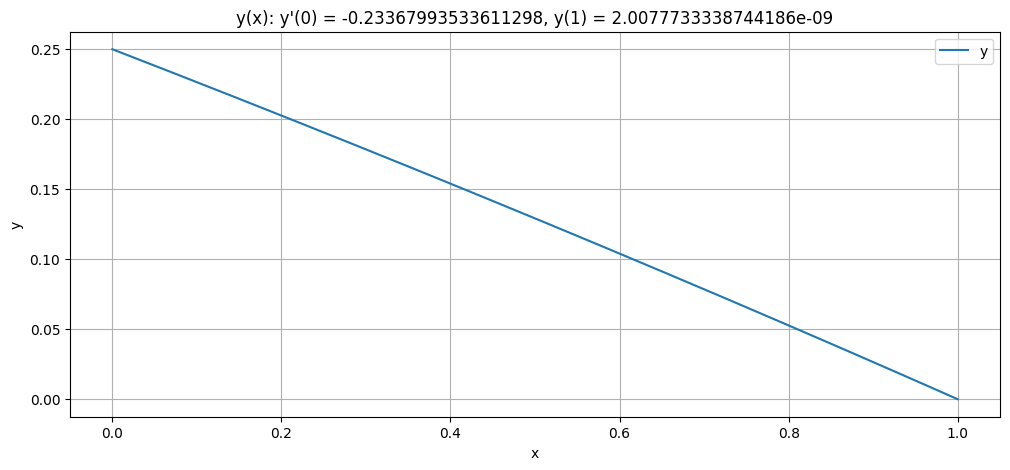

In [75]:
y0 = 0.25
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 0,5$

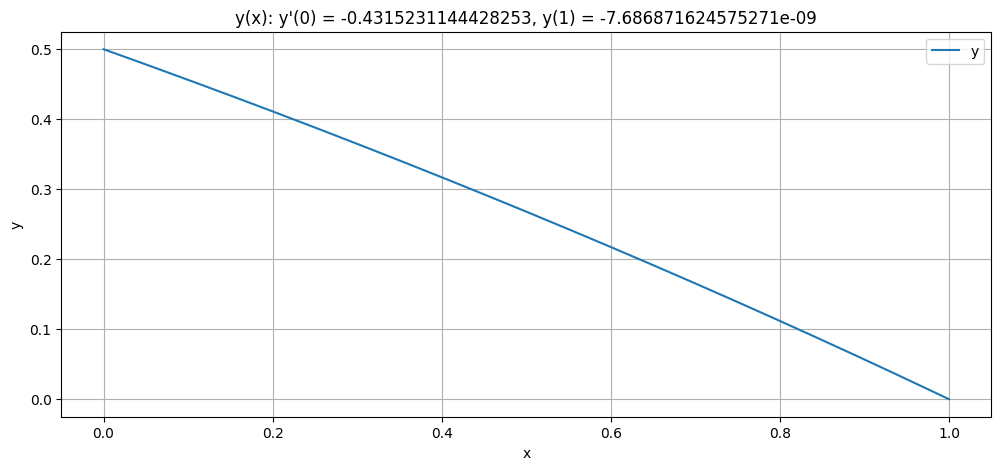

In [76]:
y0 = 0.5
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 1$

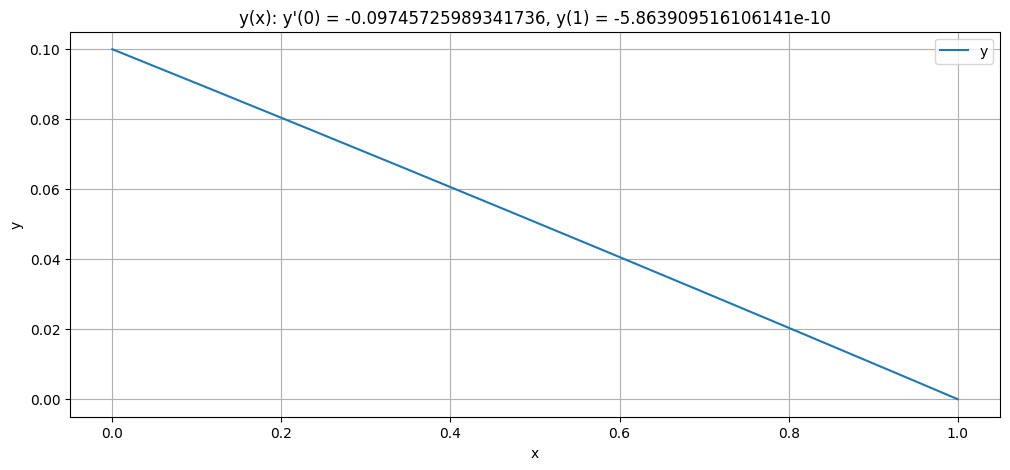

In [77]:
y0 = 0.1
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 1.5$

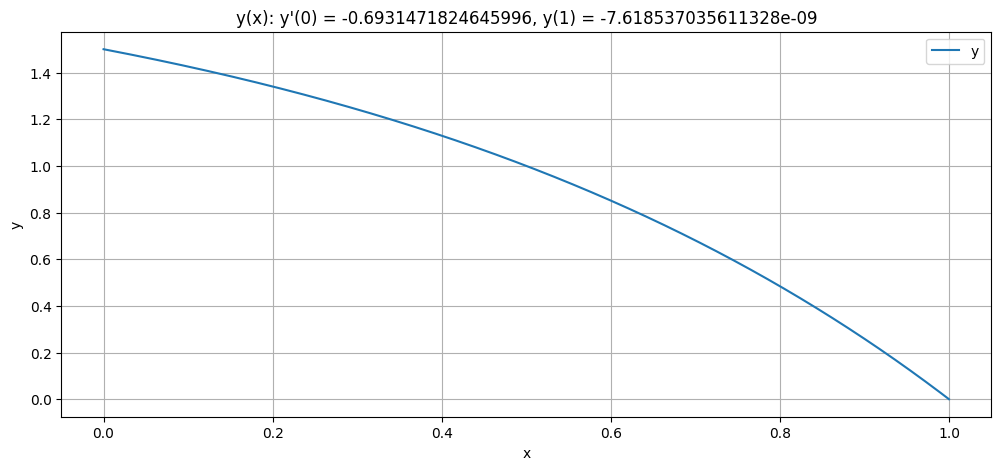

In [78]:
y0 = 1.5
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 1.8$

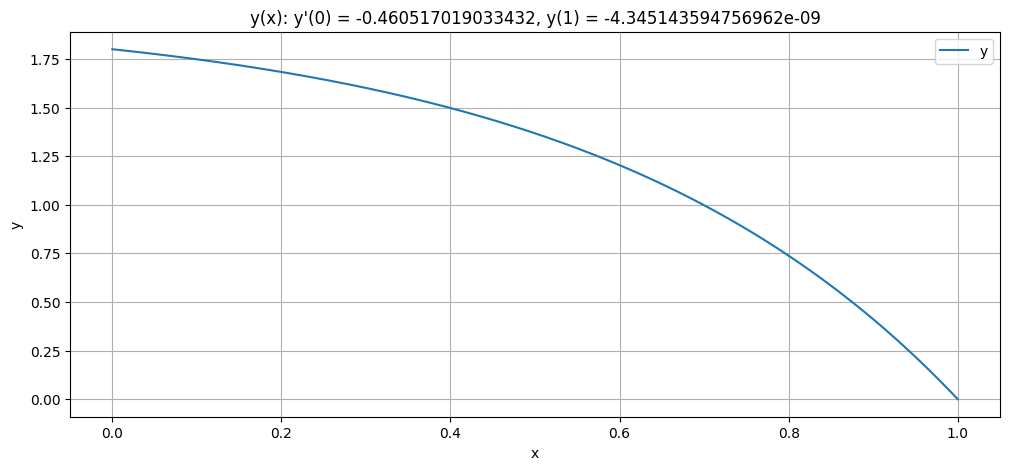

In [79]:
y0 = 1.8
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 1.9$

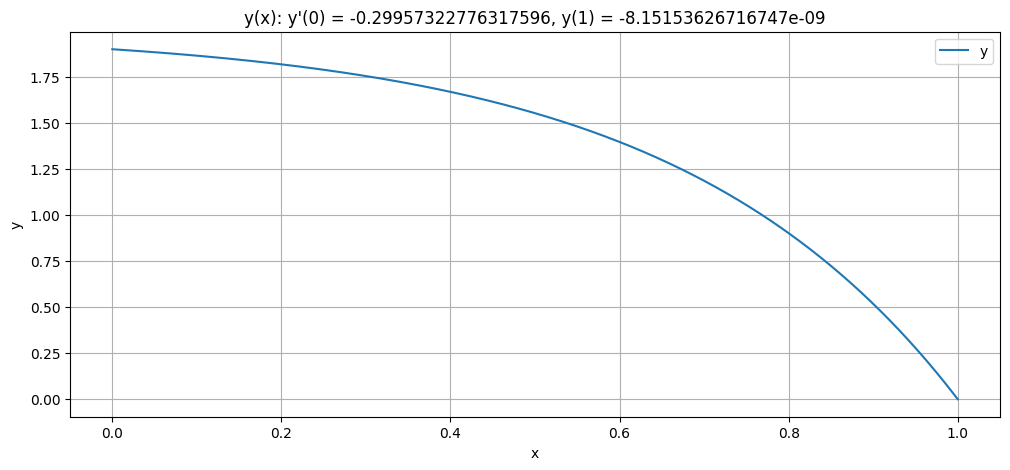

In [80]:
y0 = 1.9
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])

##### $y_0 = 1.95$

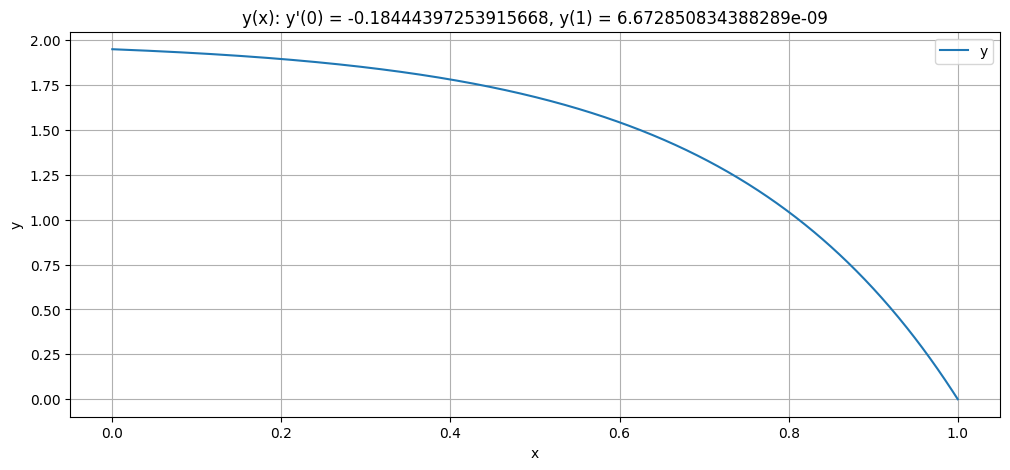

In [81]:
y0 = 1.95
sol_array, x_array = BinSolutionSearch(-1.0, 0.0, y0 = y0)
y_array = sol_array.transpose()[0]
ShowSoulutionPlots(y_array, x_array, sol_array[0][1], sol_array[-1][0])